___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://machinelearningmastery.com/wp-content/uploads/2016/03/Compare-Machine-Learning-Algorithms.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Ana Rosaura Zamarrón Álvarez </Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `ana.zamarron@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Comparación de modelos de regresión</font>

Una vez que aprendimos a crear los modelos de machine learning ¿qué hacemos con ellos?

Comparar varios modelos de machine learning para problemas de regresión es necesario para poder encontrar cuál de todos los modelos es el más eficiente y tiene los resultados más precisos. 

Hay muchos criterios para comparar los modelos. 

Recordando que si la **variable de respuesta es continua** entonces, este es un problema de **regresión** y tenemos que usar modelos de regresión para estimar los valores predichos. 

Como vimos, hay muchos modelos de regresión candidatos. Nuestra tarea es encontrar el que sirva a nuestro propósito.

Vamos a comparar los siguientes modelos:
- Regresión lineal múltiple
- Regresión LASSO
- Regresión Ridge
- Árbol de decisión
- Bosques Aleatorios
- XGboost
- SVR
- Redes Neuronales

Vamos a utilizar varias métricas para comparar los modelos.

### Métricas de Performance (Regresión)

**Error Absoluto Medio (Mean Absolute Error - MAE)**

Si $y$ es la variable de respuesta y $\hat{y}$ es la predicción, entonces el MAE es el error entre estos pares ($y$,$\hat{y}$) de variables y se calcula de la forma:

$$MAE = \frac{\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|}{n}$$

*¿Qué hace?*
- Mide el promedio del error absoluto entre los valores reales y las predicciones

*Ventajas*
- Es una métrica independiente de la escala, lo que significa que está en las mismas unidades de las variables originales. 
- Fácil de interpretar
- Es buena opción si no nos importan los valores atípicos

*Desventajas*
- Se les da la misma importancia (peso) a todos los errores
- Es insensible a valores atípicos



**Error Cuadrático Medio (Mean Square Error - MSE)**


$$MSE = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{n}$$

*¿Qué hace?*
El MSE calcula el promedio de los cuadrados del error entre los valores verdaderos y los valores estimados

*Ventajas*
- Función diferenciable
- El efecto de errores más grandes se vuelve más pronunciado que los errores más pequeños

*Desventajas*
- Tiene diferentes unidades que los valores reales


**Diferencia entre el MAE y el MSE**

La gran diferencia es cómo responden a errores más grandes. 

Depende mucho de la decisión del negocio y el costo asociado a los errores. 
     
 **R^2**
 
 $$R^{2}=1-\frac{SS_{res}}{SS_{Tot}}= \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$
 
 *¿Qué hace?*
- Explica la proporción de la varianza de la salida ("Y") que puede ser explicada por los predictores ("X")

*Desventajas*
- Siempre incrementa añadiendo más variables independientes (X), lo cual es una desventaja porque esas variables pueden no ser importantes para el modelo

*Ventajas*
- Es una métrica relativa que se usa para comparar varios modelos que fueron entrenados con los mismos datos

     
     
 

### Los Datos

Tenemos un dataset de personas que tienen un carro y lo quieren vender. Se tienen las siguientes variables:

- Age 
- Gender
- Miles: promedio de millas manejadas por día
- Debt
- Income
- Sales

Basados en esas variables, queremos predecir el valor potencial de venta de un carro, por lo que variable a predecir es "Sales". 

In [1]:
#Librerías

import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD, Adam


In [2]:
#cargar datos
datos = pd.read_csv('carros.csv')
datos.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [3]:
#Revisamos si hay datos nulos
missing = pd.DataFrame(datos.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
age,0
gender,0
miles,0
debt,0
income,0
sales,0


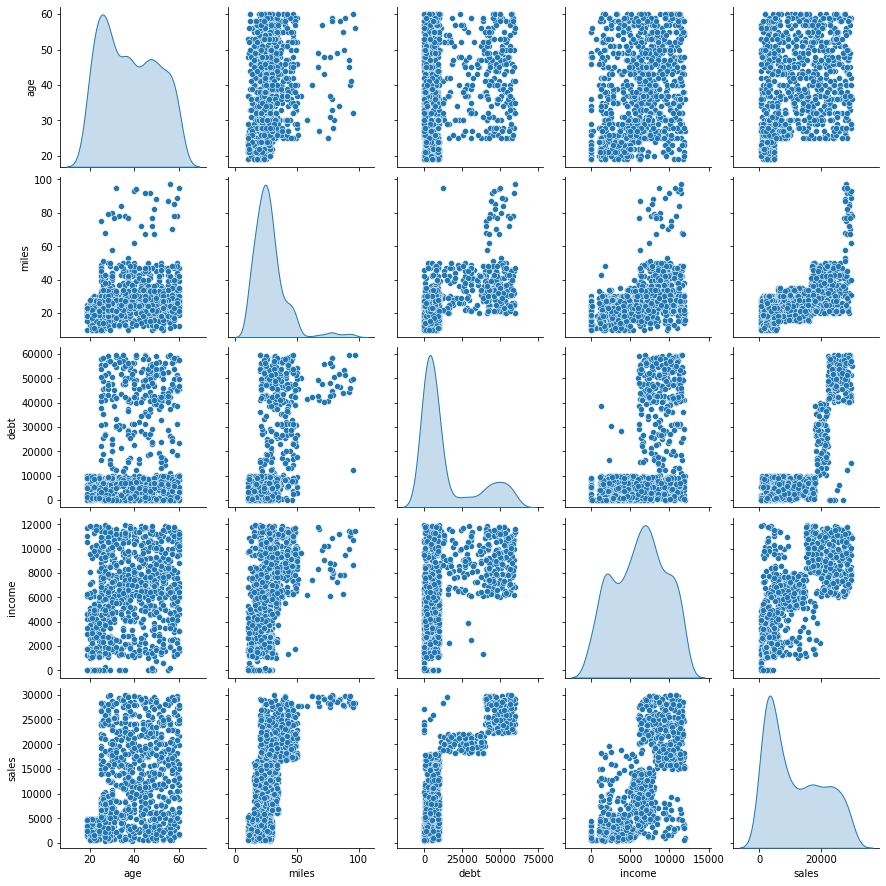

In [4]:
#Creamos gráficos básicos de los datos
sns.pairplot(datos[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [5]:
#Calculando estadísticas básicas con los datos
datos_stats = datos.describe()
datos_stats = datos_stats.transpose()
datos_stats

,count,mean,std,min,25%,50%,75%,max
age,963.0,37.971963,12.290838,19.0,27.0,37.0,49.0,60.0
gender,963.0,0.512980,0.500091,0.0,0.0,1.0,1.0,1.0
miles,963.0,27.704050,13.378181,10.0,20.0,25.0,32.0,97.0
debt,963.0,14109.004154,18273.702481,0.0,1475.0,6236.0,16686.0,59770.0
income,963.0,6176.047767,3260.670142,0.0,3506.5,6360.0,8649.5,11970.0
sales,963.0,11689.860852,8986.896921,500.0,3554.0,9130.0,19245.0,29926.0


De las estadísticas anteriores podemos observar que algunas variables tienen grandes rangos y desviaciones, lo cual puede crear problemas durante el ajuste del modelo. Por lo tanto sería buena idea escalar los datos. 

### Train Test split

In [6]:
#separar la X y Y
X=datos.iloc[:,0:5]
y=datos.iloc[:,5]

#Dividimos los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Estandarizar datos
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

**¿Porqué estandarizar los datos después del train test split?**

El escalamiento debe realizarse después de dividir los datos en entrenamiento y prueba, y se debe hacer sólo usando los datos de entrenamiento. 

Esto se debe a que los datos de prueba (test) tienen el papel de datos no vistos por el modelo, por lo que se supone que estos datos no están accesibles en la estapa del entrenamiento. 

Usar cualquier información proveniente de los datos de prueba antes o durante el entranamiento puede afectar al desempeño del modelo

#### Regresión Lineal 


In [8]:
#Inicializo objeto de regresión lineal
lin_reg = LinearRegression()
#Entrenar modelo
lin_reg.fit(X_train,y_train)
#Predecimos con datos de prueba
y_pred = lin_reg.predict(X_test)

#Métricas de performance
mae_lr=metrics.mean_absolute_error(y_test, y_pred)
mse_lr=metrics.mean_squared_error(y_test, y_pred)
r2_lr = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('R2:  ',r2_lr)
print('MAE: ', mae_lr)
print('MSE: ', mse_lr)
print('RMSE:', np.sqrt(mse_lr))

R2:   0.8364108886819762
MAE:  0.3119007815345353
MSE:  0.1635891113180238
RMSE: 0.404461507832357


#### Regresión Lineal con selección de variables

In [9]:
#Entrenar modelo
rfe = RFE(lin_reg, n_features_to_select=4)             
rfe = rfe.fit(X_train, y_train)

#Predecimos con datos de prueba
y_pred = rfe.predict(X_test)

#Métricas de performance
mae_rfe=metrics.mean_absolute_error(y_test, y_pred)
mse_rfe=metrics.mean_squared_error(y_test, y_pred)
r2_rfe = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('R2:  ',r2_rfe)
print('MAE: ', mae_rfe)
print('MSE: ', mse_rfe)
print('RMSE:', np.sqrt(mse_rfe))

R2:   0.8367174006172184
MAE:  0.31150993315869774
MSE:  0.16328259938278153
RMSE: 0.4040824165721413


#### Regresión Lineal con regularización Ridge


In [10]:
#Inicializo modelo de ridge con alpha = 1
ridge = Ridge(alpha=1)
#Entrenar modelo
ridge.fit(X_train,y_train)
#Predecir con datos de prueba
ridge_pred = ridge.predict(X_test)

#Métricas de performance
mae_ridge = metrics.mean_absolute_error(y_test, ridge_pred)
mse_ridge=metrics.mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

# Imprimir resultados
print('R2:  ',r2_ridge)
print('MAE: ', mae_ridge)
print('MSE: ', mse_ridge)
print('RMSE:', np.sqrt(mse_ridge)) # ridge pensaliza las varibles que 
                                   # no nos importan tanto (las que no aportan información)

R2:   0.8364172531254731
MAE:  0.3119341315613786
MSE:  0.16358274687452687
RMSE: 0.4044536399570745


#### Bosques Aleatorios

In [11]:
#Inicializamos el bosque con 300 árboles
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predecir el precio de venta  
y_pred = rf_regressor.predict(X_test)

#Calcular métricas
mae_rf=metrics.mean_absolute_error(y_test, y_pred)
mse_rf=metrics.mean_squared_error(y_test, y_pred)
r2_rf=metrics.r2_score(y_test, y_pred)

#Imprimir métricas
print('R2 square:',r2_rf)
print('MAE: ', mae_rf)
print('MSE: ', mse_rf)

R2 square: 0.9083834725974465
MAE:  0.2144253698676456
MSE:  0.0916165274025536


El R2 y el MSE mejoraron bastante :)

#### Máquina de Soporte Vectorial para Regresión (SVR)

In [12]:
#Inicializar objeto
regressor= SVR(kernel='rbf')
#Entrenar modelo
regressor.fit(X_train,y_train)
#Predecir
y_pred_svm=regressor.predict(X_test)

#Calcular métricas
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svr=metrics.mean_squared_error(y_test, y_pred_svm)
r2_svr=metrics.r2_score(y_test, y_pred_svm)

# Imprimir Métricas
print('R2 square:',r2_svr)
print('MAE: ', mae_svr)
print('MSE: ', mse_svr)

R2 square: 0.8939968531978244
MAE:  0.2368613686845289
MSE:  0.10600314680217557


#### Red Neuronal

In [13]:
import tensorflow

In [14]:
#Hiperparámetros iniciales
epochs = 1000
learning_rate = 0.1
decay_rate = learning_rate/epochs
momentum = 0.8

# Crear arquitectura de la red neuronal
model = Sequential()
#5 variables de entrada, por lo tanto input_dim=5
model.add(Dense(12,activation='relu',input_dim=5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

# Configuración del optimizador
#gradiente descendente
opt = tensorflow.keras.optimizers.SGD(lr=learning_rate,momentum=momentum,
                           decay=decay_rate,nesterov=True)
#opt = keras.optimizers.Adam(lr=0.09)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mae','mse'])

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [15]:
#Ajustar modelo
history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

Epoch 1/1000
4/4 [==============================] - 1s 59ms/step - loss: 0.5894 - mae: 0.5742 - mse: 0.5894 - val_loss: 0.1987 - val_mae: 0.3447 - val_mse: 0.1987
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2149 - mae: 0.3562 - mse: 0.2149 - val_loss: 0.1614 - val_mae: 0.3029 - val_mse: 0.1614
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1765 - mae: 0.3121 - mse: 0.1765 - val_loss: 0.1458 - val_mae: 0.3019 - val_mse: 0.1458
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1611 - mae: 0.3012 - mse: 0.1611 - val_loss: 0.1316 - val_mae: 0.2794 - val_mse: 0.1316
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1522 - mae: 0.2904 - mse: 0.1522 - val_loss: 0.1268 - val_mae: 0.2795 - val_mse: 0.1268
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1475 - mae: 0.2870 - mse: 0.1475 - val_loss: 0.1199 - val_mae: 0.2693 - val_mse: 0.1199
Epoch 7/1000
4/4 [=========

4/4 [==============================] - 0s 8ms/step - loss: 0.1263 - mae: 0.2671 - mse: 0.1263 - val_loss: 0.1204 - val_mae: 0.2463 - val_mse: 0.1204
Epoch 102/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1112 - mae: 0.2426 - mse: 0.1112 - val_loss: 0.1186 - val_mae: 0.2496 - val_mse: 0.1186
Epoch 103/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1127 - mae: 0.2453 - mse: 0.1127 - val_loss: 0.1190 - val_mae: 0.2464 - val_mse: 0.1190
Epoch 104/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1144 - mae: 0.2477 - mse: 0.1144 - val_loss: 0.1219 - val_mae: 0.2490 - val_mse: 0.1219
Epoch 105/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1104 - mae: 0.2419 - mse: 0.1104 - val_loss: 0.1114 - val_mae: 0.2420 - val_mse: 0.1114
Epoch 106/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1124 - mae: 0.2452 - mse: 0.1124 - val_loss: 0.1164 - val_mae: 0.2548 - val_mse: 0.1164
Epoch 107/1000
4/4 [===========

4/4 [==============================] - 0s 9ms/step - loss: 0.1087 - mae: 0.2413 - mse: 0.1087 - val_loss: 0.1219 - val_mae: 0.2470 - val_mse: 0.1219
Epoch 152/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1111 - mae: 0.2451 - mse: 0.1111 - val_loss: 0.1176 - val_mae: 0.2415 - val_mse: 0.1176
Epoch 153/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1082 - mae: 0.2379 - mse: 0.1082 - val_loss: 0.1121 - val_mae: 0.2417 - val_mse: 0.1121
Epoch 154/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1082 - mae: 0.2397 - mse: 0.1082 - val_loss: 0.1190 - val_mae: 0.2464 - val_mse: 0.1190
Epoch 155/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1088 - mae: 0.2406 - mse: 0.1088 - val_loss: 0.1200 - val_mae: 0.2462 - val_mse: 0.1200
Epoch 156/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1086 - mae: 0.2397 - mse: 0.1086 - val_loss: 0.1136 - val_mae: 0.2455 - val_mse: 0.1136
Epoch 157/1000
4/4 [===========

4/4 [==============================] - 0s 9ms/step - loss: 0.1065 - mae: 0.2373 - mse: 0.1065 - val_loss: 0.1177 - val_mae: 0.2506 - val_mse: 0.1177
Epoch 202/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1050 - mae: 0.2374 - mse: 0.1050 - val_loss: 0.1228 - val_mae: 0.2477 - val_mse: 0.1228
Epoch 203/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1093 - mae: 0.2412 - mse: 0.1093 - val_loss: 0.1140 - val_mae: 0.2392 - val_mse: 0.1140
Epoch 204/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1042 - mae: 0.2341 - mse: 0.1042 - val_loss: 0.1141 - val_mae: 0.2439 - val_mse: 0.1141
Epoch 205/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1039 - mae: 0.2348 - mse: 0.1039 - val_loss: 0.1200 - val_mae: 0.2623 - val_mse: 0.1200
Epoch 206/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1081 - mae: 0.2450 - mse: 0.1081 - val_loss: 0.1138 - val_mae: 0.2415 - val_mse: 0.1138
Epoch 207/1000
4/4 [===========

4/4 [==============================] - 0s 9ms/step - loss: 0.1047 - mae: 0.2362 - mse: 0.1047 - val_loss: 0.1365 - val_mae: 0.2672 - val_mse: 0.1365
Epoch 252/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1044 - mae: 0.2372 - mse: 0.1044 - val_loss: 0.1180 - val_mae: 0.2453 - val_mse: 0.1180
Epoch 253/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1014 - mae: 0.2309 - mse: 0.1014 - val_loss: 0.1130 - val_mae: 0.2462 - val_mse: 0.1130
Epoch 254/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1019 - mae: 0.2327 - mse: 0.1019 - val_loss: 0.1099 - val_mae: 0.2447 - val_mse: 0.1099
Epoch 255/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1025 - mae: 0.2317 - mse: 0.1025 - val_loss: 0.1147 - val_mae: 0.2504 - val_mse: 0.1147
Epoch 256/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1032 - mae: 0.2340 - mse: 0.1032 - val_loss: 0.1244 - val_mae: 0.2652 - val_mse: 0.1244
Epoch 257/1000
4/4 [===========

4/4 [==============================] - 0s 8ms/step - loss: 0.1229 - mae: 0.2628 - mse: 0.1229 - val_loss: 0.1292 - val_mae: 0.2766 - val_mse: 0.1292
Epoch 302/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1137 - mae: 0.2564 - mse: 0.1137 - val_loss: 0.1195 - val_mae: 0.2493 - val_mse: 0.1195
Epoch 303/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1071 - mae: 0.2395 - mse: 0.1071 - val_loss: 0.1520 - val_mae: 0.2887 - val_mse: 0.1520
Epoch 304/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1287 - mae: 0.2646 - mse: 0.1287 - val_loss: 0.1171 - val_mae: 0.2602 - val_mse: 0.1171
Epoch 305/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1040 - mae: 0.2342 - mse: 0.1040 - val_loss: 0.1137 - val_mae: 0.2448 - val_mse: 0.1137
Epoch 306/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1015 - mae: 0.2293 - mse: 0.1015 - val_loss: 0.1133 - val_mae: 0.2422 - val_mse: 0.1133
Epoch 307/1000
4/4 [===========

4/4 [==============================] - 0s 9ms/step - loss: 0.1051 - mae: 0.2359 - mse: 0.1051 - val_loss: 0.1440 - val_mae: 0.2771 - val_mse: 0.1440
Epoch 352/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1065 - mae: 0.2389 - mse: 0.1065 - val_loss: 0.1274 - val_mae: 0.2583 - val_mse: 0.1274
Epoch 353/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1075 - mae: 0.2369 - mse: 0.1075 - val_loss: 0.1123 - val_mae: 0.2431 - val_mse: 0.1123
Epoch 354/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0996 - mae: 0.2264 - mse: 0.0996 - val_loss: 0.1131 - val_mae: 0.2455 - val_mse: 0.1131
Epoch 355/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0980 - mae: 0.2252 - mse: 0.0980 - val_loss: 0.1183 - val_mae: 0.2465 - val_mse: 0.1183
Epoch 356/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0987 - mae: 0.2261 - mse: 0.0987 - val_loss: 0.1142 - val_mae: 0.2461 - val_mse: 0.1142
Epoch 357/1000
4/4 [==========

4/4 [==============================] - 0s 8ms/step - loss: 0.0990 - mae: 0.2254 - mse: 0.0990 - val_loss: 0.1198 - val_mae: 0.2502 - val_mse: 0.1198
Epoch 402/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0982 - mae: 0.2261 - mse: 0.0982 - val_loss: 0.1157 - val_mae: 0.2532 - val_mse: 0.1157
Epoch 403/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0982 - mae: 0.2263 - mse: 0.0982 - val_loss: 0.1180 - val_mae: 0.2552 - val_mse: 0.1180
Epoch 404/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0992 - mae: 0.2277 - mse: 0.0992 - val_loss: 0.1187 - val_mae: 0.2509 - val_mse: 0.1187
Epoch 405/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1024 - mae: 0.2302 - mse: 0.1024 - val_loss: 0.1451 - val_mae: 0.2791 - val_mse: 0.1451
Epoch 406/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1055 - mae: 0.2391 - mse: 0.1055 - val_loss: 0.1224 - val_mae: 0.2506 - val_mse: 0.1224
Epoch 407/1000
4/4 [===========

4/4 [==============================] - 0s 9ms/step - loss: 0.0979 - mae: 0.2255 - mse: 0.0979 - val_loss: 0.1223 - val_mae: 0.2592 - val_mse: 0.1223
Epoch 452/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0986 - mae: 0.2275 - mse: 0.0986 - val_loss: 0.1241 - val_mae: 0.2645 - val_mse: 0.1241
Epoch 453/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1017 - mae: 0.2350 - mse: 0.1017 - val_loss: 0.1209 - val_mae: 0.2548 - val_mse: 0.1209
Epoch 454/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0999 - mae: 0.2278 - mse: 0.0999 - val_loss: 0.1178 - val_mae: 0.2482 - val_mse: 0.1178
Epoch 455/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0977 - mae: 0.2247 - mse: 0.0977 - val_loss: 0.1205 - val_mae: 0.2581 - val_mse: 0.1205
Epoch 456/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0981 - mae: 0.2286 - mse: 0.0981 - val_loss: 0.1189 - val_mae: 0.2502 - val_mse: 0.1189
Epoch 457/1000
4/4 [===========

4/4 [==============================] - 0s 9ms/step - loss: 0.1016 - mae: 0.2309 - mse: 0.1016 - val_loss: 0.1206 - val_mae: 0.2478 - val_mse: 0.1206
Epoch 502/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0962 - mae: 0.2229 - mse: 0.0962 - val_loss: 0.1186 - val_mae: 0.2506 - val_mse: 0.1186
Epoch 503/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0979 - mae: 0.2271 - mse: 0.0979 - val_loss: 0.1180 - val_mae: 0.2508 - val_mse: 0.1180
Epoch 504/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0975 - mae: 0.2254 - mse: 0.0975 - val_loss: 0.1213 - val_mae: 0.2508 - val_mse: 0.1213
Epoch 505/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0969 - mae: 0.2219 - mse: 0.0969 - val_loss: 0.1221 - val_mae: 0.2645 - val_mse: 0.1221
Epoch 506/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0997 - mae: 0.2319 - mse: 0.0997 - val_loss: 0.1218 - val_mae: 0.2531 - val_mse: 0.1218
Epoch 507/1000
4/4 [===========

4/4 [==============================] - 0s 9ms/step - loss: 0.1014 - mae: 0.2330 - mse: 0.1014 - val_loss: 0.1272 - val_mae: 0.2573 - val_mse: 0.1272
Epoch 552/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0987 - mae: 0.2268 - mse: 0.0987 - val_loss: 0.1205 - val_mae: 0.2514 - val_mse: 0.1205
Epoch 553/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0949 - mae: 0.2213 - mse: 0.0949 - val_loss: 0.1221 - val_mae: 0.2523 - val_mse: 0.1221
Epoch 554/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0995 - mae: 0.2290 - mse: 0.0995 - val_loss: 0.1183 - val_mae: 0.2519 - val_mse: 0.1183
Epoch 555/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0998 - mae: 0.2300 - mse: 0.0998 - val_loss: 0.1353 - val_mae: 0.2687 - val_mse: 0.1353
Epoch 556/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1019 - mae: 0.2355 - mse: 0.1019 - val_loss: 0.1191 - val_mae: 0.2581 - val_mse: 0.1191
Epoch 557/1000
4/4 [===========

Epoch 601/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1073 - mae: 0.2377 - mse: 0.1073 - val_loss: 0.1245 - val_mae: 0.2537 - val_mse: 0.1245
Epoch 602/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0977 - mae: 0.2234 - mse: 0.0977 - val_loss: 0.1206 - val_mae: 0.2606 - val_mse: 0.1206
Epoch 603/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0981 - mae: 0.2254 - mse: 0.0981 - val_loss: 0.1247 - val_mae: 0.2713 - val_mse: 0.1247
Epoch 604/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1069 - mae: 0.2445 - mse: 0.1069 - val_loss: 0.1452 - val_mae: 0.3027 - val_mse: 0.1452
Epoch 605/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1063 - mae: 0.2428 - mse: 0.1063 - val_loss: 0.1207 - val_mae: 0.2535 - val_mse: 0.1207
Epoch 606/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0956 - mae: 0.2224 - mse: 0.0956 - val_loss: 0.1294 - val_mae: 0.2714 - val_mse: 0.1294
Epoch 607/1000
4

Epoch 651/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0978 - mae: 0.2309 - mse: 0.0978 - val_loss: 0.1196 - val_mae: 0.2487 - val_mse: 0.1196
Epoch 652/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0957 - mae: 0.2224 - mse: 0.0957 - val_loss: 0.1255 - val_mae: 0.2566 - val_mse: 0.1255
Epoch 653/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0966 - mae: 0.2230 - mse: 0.0966 - val_loss: 0.1184 - val_mae: 0.2491 - val_mse: 0.1184
Epoch 654/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0932 - mae: 0.2189 - mse: 0.0932 - val_loss: 0.1196 - val_mae: 0.2549 - val_mse: 0.1196
Epoch 655/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0938 - mae: 0.2214 - mse: 0.0938 - val_loss: 0.1228 - val_mae: 0.2528 - val_mse: 0.1228
Epoch 656/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0944 - mae: 0.2205 - mse: 0.0944 - val_loss: 0.1201 - val_mae: 0.2559 - val_mse: 0.1201
Epoch 657/10

Epoch 701/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0940 - mae: 0.2236 - mse: 0.0940 - val_loss: 0.1261 - val_mae: 0.2713 - val_mse: 0.1261
Epoch 702/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0947 - mae: 0.2235 - mse: 0.0947 - val_loss: 0.1175 - val_mae: 0.2514 - val_mse: 0.1175
Epoch 703/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0931 - mae: 0.2188 - mse: 0.0931 - val_loss: 0.1212 - val_mae: 0.2628 - val_mse: 0.1212
Epoch 704/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0952 - mae: 0.2262 - mse: 0.0952 - val_loss: 0.1444 - val_mae: 0.2810 - val_mse: 0.1444
Epoch 705/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1055 - mae: 0.2405 - mse: 0.1055 - val_loss: 0.1272 - val_mae: 0.2574 - val_mse: 0.1272
Epoch 706/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0941 - mae: 0.2220 - mse: 0.0941 - val_loss: 0.1283 - val_mae: 0.2602 - val_mse: 0.1283
Epoch 707/1000

Epoch 751/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0953 - mae: 0.2230 - mse: 0.0953 - val_loss: 0.1222 - val_mae: 0.2633 - val_mse: 0.1222
Epoch 752/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0928 - mae: 0.2223 - mse: 0.0928 - val_loss: 0.1215 - val_mae: 0.2527 - val_mse: 0.1215
Epoch 753/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0966 - mae: 0.2259 - mse: 0.0966 - val_loss: 0.1253 - val_mae: 0.2673 - val_mse: 0.1253
Epoch 754/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0942 - mae: 0.2204 - mse: 0.0942 - val_loss: 0.1260 - val_mae: 0.2711 - val_mse: 0.1260
Epoch 755/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0960 - mae: 0.2272 - mse: 0.0960 - val_loss: 0.1270 - val_mae: 0.2595 - val_mse: 0.1270
Epoch 756/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0970 - mae: 0.2266 - mse: 0.0970 - val_loss: 0.1434 - val_mae: 0.2811 - val_mse: 0.1434
Epoch 757/1000

Epoch 801/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0948 - mae: 0.2213 - mse: 0.0948 - val_loss: 0.1233 - val_mae: 0.2546 - val_mse: 0.1233
Epoch 802/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.1052 - mae: 0.2344 - mse: 0.1052 - val_loss: 0.1233 - val_mae: 0.2533 - val_mse: 0.1233
Epoch 803/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0957 - mae: 0.2213 - mse: 0.0957 - val_loss: 0.1303 - val_mae: 0.2633 - val_mse: 0.1303
Epoch 804/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0956 - mae: 0.2242 - mse: 0.0956 - val_loss: 0.1290 - val_mae: 0.2728 - val_mse: 0.1290
Epoch 805/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0983 - mae: 0.2292 - mse: 0.0983 - val_loss: 0.1273 - val_mae: 0.2734 - val_mse: 0.1273
Epoch 806/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0955 - mae: 0.2261 - mse: 0.0955 - val_loss: 0.1225 - val_mae: 0.2525 - val_mse: 0.1225
Epoch 807/

Epoch 851/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0984 - mae: 0.2251 - mse: 0.0984 - val_loss: 0.1204 - val_mae: 0.2557 - val_mse: 0.1204
Epoch 852/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0931 - mae: 0.2186 - mse: 0.0931 - val_loss: 0.1186 - val_mae: 0.2520 - val_mse: 0.1186
Epoch 853/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0951 - mae: 0.2222 - mse: 0.0951 - val_loss: 0.1185 - val_mae: 0.2540 - val_mse: 0.1185
Epoch 854/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0942 - mae: 0.2211 - mse: 0.0942 - val_loss: 0.1196 - val_mae: 0.2510 - val_mse: 0.1196
Epoch 855/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0919 - mae: 0.2191 - mse: 0.0919 - val_loss: 0.1273 - val_mae: 0.2577 - val_mse: 0.1273
Epoch 856/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0922 - mae: 0.2173 - mse: 0.0922 - val_loss: 0.1180 - val_mae: 0.2537 - val_mse: 0.1180
Epoch 857/

Epoch 901/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0924 - mae: 0.2221 - mse: 0.0924 - val_loss: 0.1262 - val_mae: 0.2638 - val_mse: 0.1262
Epoch 902/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0963 - mae: 0.2282 - mse: 0.0963 - val_loss: 0.1190 - val_mae: 0.2503 - val_mse: 0.1190
Epoch 903/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0924 - mae: 0.2164 - mse: 0.0924 - val_loss: 0.1189 - val_mae: 0.2508 - val_mse: 0.1189
Epoch 904/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0943 - mae: 0.2211 - mse: 0.0943 - val_loss: 0.1209 - val_mae: 0.2540 - val_mse: 0.1209
Epoch 905/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0918 - mae: 0.2175 - mse: 0.0918 - val_loss: 0.1165 - val_mae: 0.2524 - val_mse: 0.1165
Epoch 906/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0928 - mae: 0.2219 - mse: 0.0928 - val_loss: 0.1357 - val_mae: 0.2769 - val_mse: 0.1357
Epoch 907/10

Epoch 951/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0900 - mae: 0.2159 - mse: 0.0900 - val_loss: 0.1229 - val_mae: 0.2530 - val_mse: 0.1229
Epoch 952/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0896 - mae: 0.2134 - mse: 0.0896 - val_loss: 0.1348 - val_mae: 0.2824 - val_mse: 0.1348
Epoch 953/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0928 - mae: 0.2234 - mse: 0.0928 - val_loss: 0.1285 - val_mae: 0.2619 - val_mse: 0.1285
Epoch 954/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0979 - mae: 0.2268 - mse: 0.0979 - val_loss: 0.1222 - val_mae: 0.2577 - val_mse: 0.1222
Epoch 955/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0940 - mae: 0.2234 - mse: 0.0940 - val_loss: 0.1188 - val_mae: 0.2490 - val_mse: 0.1188
Epoch 956/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0934 - mae: 0.2223 - mse: 0.0934 - val_loss: 0.1250 - val_mae: 0.2596 - val_mse: 0.1250
Epoch 957/1000


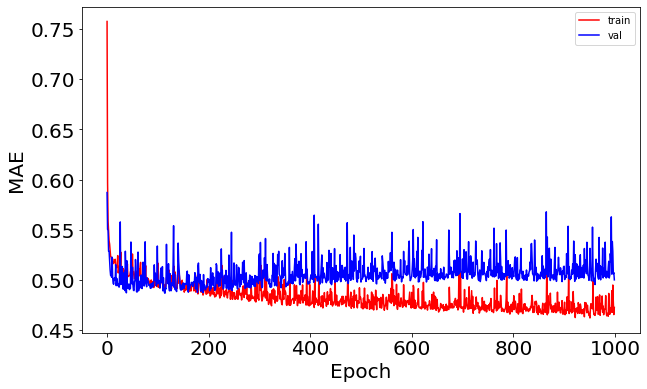

In [16]:
#Graficar el MAE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mae']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mae']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MAE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

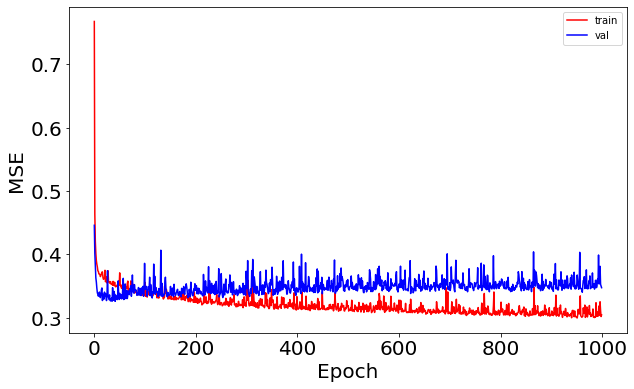

In [17]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Con los gráficos de arriba podemos observar que tanto las métricas de train y de validación disminuyen exponencialmentes con el incremento del número de épocas. 

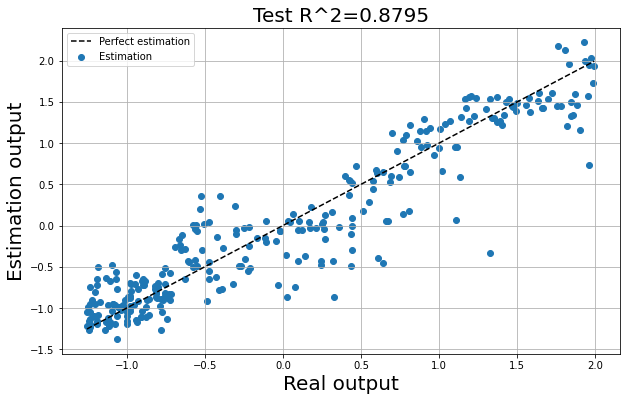

In [18]:
#Predecir
yhat = model.predict(X_test)

#Calcular R2
R2_score = r2_score(y_test,yhat)

#Graficar la R2
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [19]:
#Calcular métricas
mae_nn=metrics.mean_absolute_error(y_test, yhat)
mse_nn=metrics.mean_squared_error(y_test, yhat)
r2_nn=metrics.r2_score(y_test, yhat)

# imprimir Métricas
print('R2 square:',r2_nn)
print('MAE: ', mae_nn)
print('MSE: ', mse_nn)

R2 square: 0.8795031830016018
MAE:  0.24999008114858678
MSE:  0.12049681699839815


#### Resultados con train test split

In [20]:
data_compar_train_test = {'Modelo': ['LR', 'LR RFE', 'Ridge', 'RF', ' SVR', 'NN'], 'R2': [r2_lr, r2_rfe, r2_ridge, r2_rf, r2_svr, r2_nn], 'MSE': [mse_lr, mse_rfe, mse_ridge, mse_rf, mse_svr, mse_nn], 'MAE': [mae_lr, mae_rfe, mae_ridge,mae_rf,mae_svr, mae_nn]} 
data_compar_train_test = pd.DataFrame(data_compar_train_test)
data_compar_train_test

,Modelo,R2,MSE,MAE
0,LR,0.836411,0.163589,0.311901
1,LR RFE,0.836717,0.163283,0.311510
2,Ridge,0.836417,0.163583,0.311934
3,RF,0.908383,0.091617,0.214425
4,SVR,0.893997,0.106003,0.236861
5,NN,0.879503,0.120497,0.249990


### Cross Validation con optimización de hiperparámetros

La idea es dividir los datos en train y test, entrenar múltiples modelos muestreando los datos de entrenamiento. 
Finalmente probar el modelo en el test set



<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/700/1*4G__SV580CxFj78o9yUXuQ.png" width="450px" height="280px" />


In [21]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

#### Regresión Lineal

In [22]:
#Inicializar modelo
lm=LinearRegression()
#Hacer el cross validation

#r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
#print("R2", r2_lr)
#mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
#print("MAE", mae_lr)
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
print("MSE", mse_lr)

MSE 0.18158541560608504


#### Regresión lineal con selección de variables (RFE)

In [23]:
# Hacer el grid search
#Especificar el modelo
lm = LinearRegression()
#Ajustar datos
lm.fit(X_train, y_train)
#Inicializar modelo de Recursive Feature Elimination para selección de variables
rfe = RFE(lm)             

#Especificar rango de hiperparámetros a tunear
hyper_params = [{'n_features_to_select': list(range(1, np.shape(X_train)[1]+1))}]

# Crear el grid search
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      

# Entrenar modelo
model_cv.fit(X_train, y_train) 


# cv resultados
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['mean_train_score'] = -cv_results['mean_train_score']
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005877,0.001156,0.000616,0.000122,1,{'n_features_to_select': 1},-0.321596,-0.263574,-0.424232,-0.255498,...,-0.312623,0.060686,5,-0.308846,-0.323449,-0.283638,-0.325489,-0.314806,0.311246,0.015049
1,0.004107,0.000815,0.000569,0.000102,2,{'n_features_to_select': 2},-0.232072,-0.183370,-0.263436,-0.196780,...,-0.216501,0.028373,4,-0.209800,-0.222133,-0.202901,-0.218728,-0.216196,0.213952,0.006843
2,0.004282,0.000976,0.001155,0.001049,3,{'n_features_to_select': 3},-0.212934,-0.159080,-0.219450,-0.169971,...,-0.190506,0.023454,3,-0.182087,-0.195243,-0.180983,-0.192551,-0.187345,0.187642,0.005606
3,0.002410,0.000574,0.000547,0.000120,4,{'n_features_to_select': 4},-0.195132,-0.144301,-0.228759,-0.159434,...,-0.181349,0.029310,1,-0.173999,-0.186198,-0.166410,-0.182465,-0.177559,0.177326,0.006862
4,0.001654,0.000269,0.000736,0.000047,5,{'n_features_to_select': 5},-0.195382,-0.144567,-0.229107,-0.159635,...,-0.181585,0.029347,2,-0.173862,-0.186050,-0.166401,-0.182340,-0.177444,0.177219,0.006820


#### Rigde

In [24]:
from sklearn.linear_model import RidgeCV
#Inicializar modelo de Ridge con cross validation para seleccionar el hiperparámetro de alpha óptimo
model = RidgeCV(alphas=np.arange(0,1,0.01), cv=kfold, scoring='neg_mean_squared_error') 
#Entreno modelo
model.fit(X_train, y_train)

#Obtener métricas
mse_ridge = -model.best_score_
print('alfa: %f' % model.alpha_)
print('MSE',mse_ridge)

alfa: 0.990000
MSE 0.18157632845372018


#### Random Forest



In [26]:
from sklearn.ensemble import RandomForestRegressor

#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV
#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': [100, 300, 500, 800],
                                'criterion': ['mse']}, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print(gs.best_params_)

{'criterion': 'mse', 'max_depth': 8, 'min_samples_split': 30, 'n_estimators': 800}


In [27]:
#crear modelo usando parámetros óptimos
new_model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=8,
                               min_samples_split=30,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
#print("R2", r2_lr)
#mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
#print("MAE", mae_lr)
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
print("MSE", mse_rf)

MSE 0.10667653653789569


#### Árbol de decisión

In [28]:
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 50}


In [29]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=50)

mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
print("MSE", mse_tree)

MSE 0.11514499443663606


#### Máquina de vector soporte (SVR)

In [30]:
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [31]:
#crear modelo usando parámetros óptimos
new_model_svr = SVR(kernel='rbf', C=1000, gamma=0.001)
mse_svr= (-cross_val_score(new_model_svr, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
mse_svr= (-cross_val_score(new_model_svr, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
print("MSE", mse_svr)

MSE 0.15140710445215186


#### Red Neuronal

In [32]:
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Optimizer configuration
    opt = tensorflow.keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

print('Mejores parámetros:')
print(grid_result.best_params_)


Epoch 1/200


/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4309 - mse: 0.4309
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2019 - mse: 0.2019
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1645 - mse: 0.1645
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1652 - mse: 0.1652
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1462 - mse: 0.1462
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1467 - mse: 0.1467
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1447 - mse: 0.1447
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1539 - mse: 0.1539
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1463 - mse: 0.1463
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1343 - mse: 0.1343
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1078 - mse: 0.1078
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1094 - mse: 0.1094
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1104 - mse: 0.1104
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1098 - mse: 0.1098
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1070 - mse: 0.1070
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.0982 - mse: 0.0982
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1105 - mse: 0.1105
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0995 - mse: 0.0995
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1046 - mse: 0.1046
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1113 - mse: 0.1113
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1042 - mse: 0.1042
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0995 - mse: 0.0995
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0984 - mse: 0.0984
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1115 - mse: 0.1115
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4394 - mse: 0.4394
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1964 - mse: 0.1964
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1872 - mse: 0.1872
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1820 - mse: 0.1820
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1614 - mse: 0.1614
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1544 - mse: 0.1544
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1587 - mse: 0.1587
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1522 - mse: 0.1522
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1539 - mse: 0.1539
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1480 - mse: 0.1480
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1170 - mse: 0.1170
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 0.1211
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1104 - mse: 0.1104
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1094 - mse: 0.1094
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1040 - mse: 0.1040
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1105 - mse: 0.1105
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1041 - mse: 0.1041
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 0.1064
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0971 - mse: 0.0971
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1000 - mse: 0.1000
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1079 - mse: 0.1079
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1039 - mse: 0.1039
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4377 - mse: 0.4377
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1935 - mse: 0.1935
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1623 - mse: 0.1623
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1615 - mse: 0.1615
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1440 - mse: 0.1440
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1540 - mse: 0.1540
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1355 - mse: 0.1355
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1414 - mse: 0.1414
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1371 - mse: 0.1371
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1091 - mse: 0.1091
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1092 - mse: 0.1092
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1242 - mse: 0.1242
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1198 - mse: 0.1198
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.0984 - mse: 0.0984
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1059 - mse: 0.1059
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1057 - mse: 0.1057
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1093 - mse: 0.1093
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0947 - mse: 0.0947
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0947 - mse: 0.0947
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1033 - mse: 0.1033
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1025 - mse: 0.1025
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1018 - mse: 0.1018
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.5409 - mse: 0.5409
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2212 - mse: 0.2212
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2046 - mse: 0.2046
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1662 - mse: 0.1662
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1646 - mse: 0.1646
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1541 - mse: 0.1541
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1637 - mse: 0.1637
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1634 - mse: 0.1634
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1509 - mse: 0.1509
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1462 - mse: 0.1462
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1297 - mse: 0.1297
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1146 - mse: 0.1146
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1111 - mse: 0.1111
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1236 - mse: 0.1236
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1115 - mse: 0.1115
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1099 - mse: 0.1099
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1077 - mse: 0.1077
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 0.1125
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1049 - mse: 0.1049
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0978 - mse: 0.0978
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1046 - mse: 0.1046
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1021 - mse: 0.1021
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1012 - mse: 0.1012
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3884 - mse: 0.3884
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1979 - mse: 0.1979
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1847 - mse: 0.1847
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1605 - mse: 0.1605
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1645 - mse: 0.1645
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1552 - mse: 0.1552
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1444 - mse: 0.1444
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1541 - mse: 0.1541
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1569 - mse: 0.1569
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1368 - mse: 0.1368
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1162 - mse: 0.1162
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1111 - mse: 0.1111
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1126 - mse: 0.1126
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1135 - mse: 0.1135
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1260 - mse: 0.1260
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1245 - mse: 0.1245
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1062 - mse: 0.1062
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1083 - mse: 0.1083
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0984 - mse: 0.0984
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1051 - mse: 0.1051
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1000 - mse: 0.1000
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1054 - mse: 0.1054
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0994 - mse: 0.0994
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1057 - mse: 0.1057
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1070 - mse: 0.1070
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 4ms/step - loss: 0.3086 - mse: 0.3086
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1726 - mse: 0.1726
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1667 - mse: 0.1667
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1558 - mse: 0.1558
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1525 - mse: 0.1525
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.1553
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1487 - mse: 0.1487
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1398 - mse: 0.1398
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1471 - mse: 0.1471
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1354 - mse: 0.1354
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1042 - mse: 0.1042
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1081 - mse: 0.1081
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1055 - mse: 0.1055
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1110 - mse: 0.1110
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1092 - mse: 0.1092
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1104 - mse: 0.1104
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1087 - mse: 0.1087
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1064 - mse: 0.1064
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1064 - mse: 0.1064
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1066 - mse: 0.1066
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0979 - mse: 0.0979
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1007 - mse: 0.1007
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1007 - mse: 0.1007
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1003 - mse: 0.1003
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0989 - mse: 0.0989
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0999 - mse: 0.0999
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1009 - mse: 0.1009
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1091 - mse: 0.1091
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1015 - mse: 0.1015
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4095 - mse: 0.4095
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2038 - mse: 0.2038
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1762 - mse: 0.1762
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1696 - mse: 0.1696
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1741 - mse: 0.1741
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1529 - mse: 0.1529
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1552 - mse: 0.1552
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1509 - mse: 0.1509
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1473 - mse: 0.1473
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1519 - mse: 0.1519
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1236 - mse: 0.1236
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 0.1230
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1167 - mse: 0.1167
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1189 - mse: 0.1189
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 0.1255
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1228 - mse: 0.1228
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1071 - mse: 0.1071
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1106 - mse: 0.1106
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1124 - mse: 0.1124
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1094 - mse: 0.1094
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1154 - mse: 0.1154
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1078 - mse: 0.1078
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 0.1064
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.3942 - mse: 0.3942
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1868 - mse: 0.1868
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1603 - mse: 0.1603
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1582 - mse: 0.1582
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1392 - mse: 0.1392
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1398 - mse: 0.1398
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1410 - mse: 0.1410
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1341 - mse: 0.1341
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1323 - mse: 0.1323
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1307 - mse: 0.1307
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1040 - mse: 0.1040
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1028 - mse: 0.1028
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1018 - mse: 0.1018
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1083 - mse: 0.1083
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1070 - mse: 0.1070
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0998 - mse: 0.0998
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1057 - mse: 0.1057
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1012 - mse: 0.1012
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1035 - mse: 0.1035
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.0945 - mse: 0.0945
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1026 - mse: 0.1026
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1004 - mse: 0.1004
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0963 - mse: 0.0963
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1021 - mse: 0.1021
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0993 - mse: 0.0993
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1035 - mse: 0.1035
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0963 - mse: 0.0963
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0957 - mse: 0.0957
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1003 - mse: 0.1003
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.3948 - mse: 0.3948
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2012 - mse: 0.2012
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1820 - mse: 0.1820
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1747 - mse: 0.1747
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1663 - mse: 0.1663
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1577 - mse: 0.1577
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1550 - mse: 0.1550
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1589 - mse: 0.1589
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1445 - mse: 0.1445
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1554 - mse: 0.1554
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1203 - mse: 0.1203
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1250 - mse: 0.1250
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1216 - mse: 0.1216
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 0.1230
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1238 - mse: 0.1238
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1158 - mse: 0.1158
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1099 - mse: 0.1099
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1130 - mse: 0.1130
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1374 - mse: 0.1374
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1142 - mse: 0.1142
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1188 - mse: 0.1188
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4068 - mse: 0.4068
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1767 - mse: 0.1767
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1749 - mse: 0.1749
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1633 - mse: 0.1633
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1584 - mse: 0.1584
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1564 - mse: 0.1564
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1550 - mse: 0.1550
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1521 - mse: 0.1521
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1503 - mse: 0.1503
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1493 - mse: 0.1493
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1194 - mse: 0.1194
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1216 - mse: 0.1216
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1181 - mse: 0.1181
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1146 - mse: 0.1146
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1223 - mse: 0.1223
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1086 - mse: 0.1086
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1136 - mse: 0.1136
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1067 - mse: 0.1067
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1189 - mse: 0.1189
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1124 - mse: 0.1124
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1116 - mse: 0.1116
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1100 - mse: 0.1100
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.3264 - mse: 0.3264
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1918 - mse: 0.1918
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1841 - mse: 0.1841
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1653 - mse: 0.1653
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1652 - mse: 0.1652
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1583 - mse: 0.1583
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1517 - mse: 0.1517
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1468 - mse: 0.1468
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1452 - mse: 0.1452
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1142 - mse: 0.1142
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1148 - mse: 0.1148
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1145 - mse: 0.1145
Epoch 90/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1164 - mse: 0.1164
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1073 - mse: 0.1073
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1080 - mse: 0.1080
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1093 - mse: 0.1093
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1076 - mse: 0.1076
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1078 - mse: 0.1078
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1096 - mse: 0.1096
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1113 - mse: 0.1113
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4189 - mse: 0.4189
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2033 - mse: 0.2033
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1918 - mse: 0.1918
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1855 - mse: 0.1855
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1782 - mse: 0.1782
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1732 - mse: 0.1732
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1647 - mse: 0.1647
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1645 - mse: 0.1645
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1627 - mse: 0.1627
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1608 - mse: 0.1608
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 0.1182
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1203 - mse: 0.1203
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1205 - mse: 0.1205
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1067 - mse: 0.1067
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1114 - mse: 0.1114
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1074 - mse: 0.1074
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1096 - mse: 0.1096
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1089 - mse: 0.1089
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 0.1095
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.1121
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1058 - mse: 0.1058
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1124 - mse: 0.1124
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 0.1101
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.3672 - mse: 0.3672
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1849 - mse: 0.1849
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1722 - mse: 0.1722
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1484 - mse: 0.1484
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1426 - mse: 0.1426
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1381 - mse: 0.1381
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1430 - mse: 0.1430
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1364 - mse: 0.1364
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1376 - mse: 0.1376
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1325 - mse: 0.1325
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1180 - mse: 0.1180
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1122 - mse: 0.1122
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1147 - mse: 0.1147
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1251 - mse: 0.1251
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.1182
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1183 - mse: 0.1183
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1020 - mse: 0.1020
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1036 - mse: 0.1036
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1075 - mse: 0.1075
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1050 - mse: 0.1050
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1002 - mse: 0.1002
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1041 - mse: 0.1041
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1022 - mse: 0.1022
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1042 - mse: 0.1042
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.1028
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 1ms/step - loss: 0.6387 - mse: 0.6387
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2365 - mse: 0.2365
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1864 - mse: 0.1864
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1767 - mse: 0.1767
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1736 - mse: 0.1736
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1697 - mse: 0.1697
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1659 - mse: 0.1659
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1534 - mse: 0.1534
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1531 - mse: 0.1531
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1617 - mse: 0.1617
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1207 - mse: 0.1207
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.1199
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1273 - mse: 0.1273
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1266 - mse: 0.1266
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1217 - mse: 0.1217
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.1259
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1304 - mse: 0.1304
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1135 - mse: 0.1135
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.1127
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.1151
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1215 - mse: 0.1215
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1066 - mse: 0.1066
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.1129
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2979 - mse: 0.2979
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1858 - mse: 0.1858
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1646 - mse: 0.1646
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1600 - mse: 0.1600
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1535 - mse: 0.1535
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1499 - mse: 0.1499
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1476 - mse: 0.1476
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1427 - mse: 0.1427
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1470 - mse: 0.1470
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1503 - mse: 0.1503
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.1151
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1092 - mse: 0.1092
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1103 - mse: 0.1103
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1099 - mse: 0.1099
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1145 - mse: 0.1145
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1116 - mse: 0.1116
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1111 - mse: 0.1111
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1019 - mse: 0.1019
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1039 - mse: 0.1039
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1003 - mse: 0.1003
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1019 - mse: 0.1019
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1004 - mse: 0.1004
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0997 - mse: 0.0997
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1000 - mse: 0.1000
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1042 - mse: 0.1042
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1001 - mse: 0.1001
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1022 - mse: 0.1022
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.3851 - mse: 0.3851
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1924 - mse: 0.1924
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1809 - mse: 0.1809
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1810 - mse: 0.1810
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1638 - mse: 0.1638
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1558 - mse: 0.1558
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1555 - mse: 0.1555
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1493 - mse: 0.1493
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1499 - mse: 0.1499
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1427 - mse: 0.1427
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1160 - mse: 0.1160
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1240 - mse: 0.1240
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1161 - mse: 0.1161
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1210 - mse: 0.1210
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1158 - mse: 0.1158
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1103 - mse: 0.1103
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1078 - mse: 0.1078
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1082 - mse: 0.1082
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1047 - mse: 0.1047
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 0.1043
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1071 - mse: 0.1071
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1057 - mse: 0.1057
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4501 - mse: 0.4501
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2029 - mse: 0.2029
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1890 - mse: 0.1890
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1808 - mse: 0.1808
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1660 - mse: 0.1660
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1666 - mse: 0.1666
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1633 - mse: 0.1633
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1443 - mse: 0.1443
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1499 - mse: 0.1499
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1407 - mse: 0.1407
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1249 - mse: 0.1249
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1234 - mse: 0.1234
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1266 - mse: 0.1266
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 0.1230
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1238 - mse: 0.1238
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 0.1151
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1160 - mse: 0.1160
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1212 - mse: 0.1212
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1223 - mse: 0.1223
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1164 - mse: 0.1164
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 0.1283
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1214 - mse: 0.1214
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.1199
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.5365 - mse: 0.5365
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2026 - mse: 0.2026
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1714 - mse: 0.1714
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1628 - mse: 0.1628
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1652 - mse: 0.1652
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1492 - mse: 0.1492
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1437 - mse: 0.1437
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1436 - mse: 0.1436
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1477 - mse: 0.1477
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1074 - mse: 0.1074
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.1108
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1090 - mse: 0.1090
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1092 - mse: 0.1092
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1206 - mse: 0.1206
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1098 - mse: 0.1098
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1111 - mse: 0.1111
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1167 - mse: 0.1167
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1054 - mse: 0.1054
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1091 - mse: 0.1091
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1018 - mse: 0.1018
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1054 - mse: 0.1054
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1086 - mse: 0.1086
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1067 - mse: 0.1067
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1093 - mse: 0.1093
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1041 - mse: 0.1041
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1027 - mse: 0.1027
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1039 - mse: 0.1039
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1039 - mse: 0.1039
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1031 - mse: 0.1031
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4524 - mse: 0.4524
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1721 - mse: 0.1721
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1636 - mse: 0.1636
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1560 - mse: 0.1560
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1531 - mse: 0.1531
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1531 - mse: 0.1531
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1463 - mse: 0.1463
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1464 - mse: 0.1464
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1433 - mse: 0.1433
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1404 - mse: 0.1404
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1223 - mse: 0.1223
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1207 - mse: 0.1207
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1236 - mse: 0.1236
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1278 - mse: 0.1278
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1009 - mse: 0.1009
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1055 - mse: 0.1055
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1040 - mse: 0.1040
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1019 - mse: 0.1019
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1004 - mse: 0.1004
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1031 - mse: 0.1031
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1047 - mse: 0.1047
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1019 - mse: 0.1019
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1012 - mse: 0.1012
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4251 - mse: 0.4251
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2103 - mse: 0.2103
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1715 - mse: 0.1715
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1727 - mse: 0.1727
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1658 - mse: 0.1658
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1457 - mse: 0.1457
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1406 - mse: 0.1406
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1393 - mse: 0.1393
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1350 - mse: 0.1350
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1113 - mse: 0.1113
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1113 - mse: 0.1113
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1116 - mse: 0.1116
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1161 - mse: 0.1161
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1079 - mse: 0.1079
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 0.1095
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1094 - mse: 0.1094
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1110 - mse: 0.1110
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1088 - mse: 0.1088
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1040 - mse: 0.1040
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1040 - mse: 0.1040
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1059 - mse: 0.1059
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0994 - mse: 0.0994
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.1028
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1020 - mse: 0.1020
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1007 - mse: 0.1007
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1001 - mse: 0.1001
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1020 - mse: 0.1020
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1035 - mse: 0.1035
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.5714 - mse: 0.5714
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2014 - mse: 0.2014
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1738 - mse: 0.1738
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1663 - mse: 0.1663
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1613 - mse: 0.1613
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1519 - mse: 0.1519
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1519 - mse: 0.1519
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1466 - mse: 0.1466
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1501 - mse: 0.1501
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1097 - mse: 0.1097
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1126 - mse: 0.1126
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1119 - mse: 0.1119
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1075 - mse: 0.1075
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1093 - mse: 0.1093
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1053 - mse: 0.1053
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1030 - mse: 0.1030
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1008 - mse: 0.1008
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1092 - mse: 0.1092
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1014 - mse: 0.1014
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1019 - mse: 0.1019
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0989 - mse: 0.0989
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1055 - mse: 0.1055
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0998 - mse: 0.0998
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4689 - mse: 0.4689
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2270 - mse: 0.2270
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1989 - mse: 0.1989
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1862 - mse: 0.1862
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1777 - mse: 0.1777
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1727 - mse: 0.1727
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1725 - mse: 0.1725
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1675 - mse: 0.1675
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1691 - mse: 0.1691
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1651 - mse: 0.1651
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1164 - mse: 0.1164
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.1176
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1187 - mse: 0.1187
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.1199
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1122 - mse: 0.1122
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1143 - mse: 0.1143
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1114 - mse: 0.1114
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.1121
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1115 - mse: 0.1115
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1124 - mse: 0.1124
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5261 - mse: 0.5261
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2090 - mse: 0.2090
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1921 - mse: 0.1921
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1742 - mse: 0.1742
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1711 - mse: 0.1711
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1588 - mse: 0.1588
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1577 - mse: 0.1577
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1557 - mse: 0.1557
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1472 - mse: 0.1472
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1447 - mse: 0.1447
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1114 - mse: 0.1114
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1088 - mse: 0.1088
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1100 - mse: 0.1100
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1093 - mse: 0.1093
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1090 - mse: 0.1090
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1099 - mse: 0.1099
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1079 - mse: 0.1079
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1003 - mse: 0.1003
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1005 - mse: 0.1005
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1009 - mse: 0.1009
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1045 - mse: 0.1045
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1013 - mse: 0.1013
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0985 - mse: 0.0985
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0995 - mse: 0.0995
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1014 - mse: 0.1014
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1024 - mse: 0.1024
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0980 - mse: 0.0980
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 2ms/step - loss: 0.4476 - mse: 0.4476
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2342 - mse: 0.2342
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1954 - mse: 0.1954
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1777 - mse: 0.1777
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1652 - mse: 0.1652
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1575 - mse: 0.1575
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1498 - mse: 0.1498
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1472 - mse: 0.1472
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1468 - mse: 0.1468
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1465 - mse: 0.1465
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1192 - mse: 0.1192
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1198 - mse: 0.1198
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1187 - mse: 0.1187
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 0.1221
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1217 - mse: 0.1217
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1099 - mse: 0.1099
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1109 - mse: 0.1109
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 0.1125
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1074 - mse: 0.1074
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1063 - mse: 0.1063
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 0.1095
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1110 - mse: 0.1110
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1096 - mse: 0.1096
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 1ms/step - loss: 0.4425 - mse: 0.4425
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2239 - mse: 0.2239
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2012 - mse: 0.2012
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1887 - mse: 0.1887
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1760 - mse: 0.1760
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1711 - mse: 0.1711
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1630 - mse: 0.1630
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1600 - mse: 0.1600
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1539 - mse: 0.1539
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1504 - mse: 0.1504
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1145 - mse: 0.1145
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 0.1182
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1132 - mse: 0.1132
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1146 - mse: 0.1146
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1102 - mse: 0.1102
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1111 - mse: 0.1111
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1129 - mse: 0.1129
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1118 - mse: 0.1118
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1145 - mse: 0.1145
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6350 - mse: 0.6350
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2655 - mse: 0.2655
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2011 - mse: 0.2011
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1719 - mse: 0.1719
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1620 - mse: 0.1620
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1540 - mse: 0.1540
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1495 - mse: 0.1495
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1458 - mse: 0.1458
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1424 - mse: 0.1424
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1415 - mse: 0.1415
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1098 - mse: 0.1098
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1115 - mse: 0.1115
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1104 - mse: 0.1104
Epoch 90/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1107 - mse: 0.1107
Epoch 91/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1101 - mse: 0.1101
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.1141
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1103 - mse: 0.1103
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1093 - mse: 0.1093
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 96/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1095 - mse: 0.1095
Epoch 97/200
17/17 [==============================] - 0s 3ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1053 - mse: 0.1053
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 0.1064
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1041 - mse: 0.1041
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 0.1064
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1048 - mse: 0.1048
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1058 - mse: 0.1058
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1047 - mse: 0.1047
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1036 - mse: 0.1036
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1044 - mse: 0.1044
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.8847 - mse: 0.8847
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4626 - mse: 0.4626
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3078 - mse: 0.3078
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2323 - mse: 0.2323
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1961 - mse: 0.1961
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1745 - mse: 0.1745
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1663 - mse: 0.1663
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1602 - mse: 0.1602
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1613 - mse: 0.1613
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1538 - mse: 0.1538
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1296 - mse: 0.1296
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1306 - mse: 0.1306
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1275 - mse: 0.1275
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1272 - mse: 0.1272
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1247 - mse: 0.1247
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1269 - mse: 0.1269
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1243 - mse: 0.1243
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1232 - mse: 0.1232
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1165 - mse: 0.1165
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.1172
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1140 - mse: 0.1140
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.1164
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1150 - mse: 0.1150
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.6997 - mse: 0.6997
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1995 - mse: 0.1995
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1728 - mse: 0.1728
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1568 - mse: 0.1568
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1480 - mse: 0.1480
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1437 - mse: 0.1437
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1396 - mse: 0.1396
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1390 - mse: 0.1390
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1358 - mse: 0.1358
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1337 - mse: 0.1337
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1066 - mse: 0.1066
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1061 - mse: 0.1061
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1058 - mse: 0.1058
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1069 - mse: 0.1069
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1056 - mse: 0.1056
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 0.1064
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1012 - mse: 0.1012
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1041 - mse: 0.1041
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1037 - mse: 0.1037
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1032 - mse: 0.1032
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1024 - mse: 0.1024
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1025 - mse: 0.1025
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1005 - mse: 0.1005
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1017 - mse: 0.1017
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1040 - mse: 0.1040
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1010 - mse: 0.1010
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4875 - mse: 0.4875
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2193 - mse: 0.2193
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1925 - mse: 0.1925
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1844 - mse: 0.1844
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1782 - mse: 0.1782
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1676 - mse: 0.1676
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1615 - mse: 0.1615
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1577 - mse: 0.1577
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1547 - mse: 0.1547
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1537 - mse: 0.1537
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1192 - mse: 0.1192
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1170 - mse: 0.1170
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1132 - mse: 0.1132
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1161 - mse: 0.1161
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 0.1125
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.1108
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1079 - mse: 0.1079
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1071 - mse: 0.1071
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1102 - mse: 0.1102
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1059 - mse: 0.1059
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1097 - mse: 0.1097
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1066 - mse: 0.1066
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1077 - mse: 0.1077
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1081 - mse: 0.1081
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4888 - mse: 0.4888
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2034 - mse: 0.2034
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1796 - mse: 0.1796
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1666 - mse: 0.1666
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1609 - mse: 0.1609
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1594 - mse: 0.1594
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1502 - mse: 0.1502
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1471 - mse: 0.1471
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1447 - mse: 0.1447
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1216 - mse: 0.1216
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1204 - mse: 0.1204
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1192 - mse: 0.1192
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1185 - mse: 0.1185
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1205 - mse: 0.1205
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1167 - mse: 0.1167
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1093 - mse: 0.1093
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1112 - mse: 0.1112
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1074 - mse: 0.1074
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1076 - mse: 0.1076
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1091 - mse: 0.1091
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1077 - mse: 0.1077
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1091 - mse: 0.1091
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1076 - mse: 0.1076
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1079 - mse: 0.1079
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.5484 - mse: 0.5484
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2902 - mse: 0.2902
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2312 - mse: 0.2312
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2008 - mse: 0.2008
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1850 - mse: 0.1850
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1768 - mse: 0.1768
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1713 - mse: 0.1713
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1671 - mse: 0.1671
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1633 - mse: 0.1633
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1602 - mse: 0.1602
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 88/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1272 - mse: 0.1272
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1271 - mse: 0.1271
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1255 - mse: 0.1255
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1247 - mse: 0.1247
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1247 - mse: 0.1247
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1246 - mse: 0.1246
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1254 - mse: 0.1254
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 173/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1168 - mse: 0.1168
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1162 - mse: 0.1162
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1169 - mse: 0.1169
Epoch 176/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1171 - mse: 0.1171
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1162 - mse: 0.1162
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1169 - mse: 0.1169
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1158 - mse: 0.1158
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1149 - mse: 0.1149
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1183 - mse: 0.1183
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.9126 - mse: 0.9126
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3227 - mse: 0.3227
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2398 - mse: 0.2398
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2198 - mse: 0.2198
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2076 - mse: 0.2076
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1987 - mse: 0.1987
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1930 - mse: 0.1930
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1899 - mse: 0.1899
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1863 - mse: 0.1863
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1811 - mse: 0.1811
Epoch 11/200
17/17 [==============================] - 0s 3m

17/17 [==============================] - 0s 3ms/step - loss: 0.1281 - mse: 0.1281
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1254 - mse: 0.1254
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1254 - mse: 0.1254
Epoch 90/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1245 - mse: 0.1245
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.1244
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1273 - mse: 0.1273
Epoch 96/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1241 - mse: 0.1241
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1175 - mse: 0.1175
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1171 - mse: 0.1171
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191
Epoch 175/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1199 - mse: 0.1199
Epoch 176/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1164 - mse: 0.1164
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1155 - mse: 0.1155
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1150 - mse: 0.1150
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1158 - mse: 0.1158
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1154 - mse: 0.1154
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 2ms/step - loss: 0.5570 - mse: 0.5570
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2295 - mse: 0.2295
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2043 - mse: 0.2043
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1915 - mse: 0.1915
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1822 - mse: 0.1822
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1735 - mse: 0.1735
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1650 - mse: 0.1650
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1596 - mse: 0.1596
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1562 - mse: 0.1562
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1503 - mse: 0.1503
Epoch 11/200
17/17 [==============================] - 0s 3m

17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1176 - mse: 0.1176
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.1172
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1180 - mse: 0.1180
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.1184
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1132 - mse: 0.1132
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1131 - mse: 0.1131
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 1ms/step - loss: 0.6479 - mse: 0.6479
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2625 - mse: 0.2625
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2137 - mse: 0.2137
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1922 - mse: 0.1922
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1834 - mse: 0.1834
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1729 - mse: 0.1729
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1665 - mse: 0.1665
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1656 - mse: 0.1656
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1608 - mse: 0.1608
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1600 - mse: 0.1600
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1257 - mse: 0.1257
Epoch 87/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1247 - mse: 0.1247
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1250 - mse: 0.1250
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.1259
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1235 - mse: 0.1235
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1252 - mse: 0.1252
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1235 - mse: 0.1235
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1239 - mse: 0.1239
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1235 - mse: 0.1235
Epoch 96/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.1175
Epoch 172/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1171 - mse: 0.1171
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1164 - mse: 0.1164
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1167 - mse: 0.1167
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1163 - mse: 0.1163
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1172 - mse: 0.1172
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 181/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 2ms/step - loss: 0.9238 - mse: 0.9238
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3078 - mse: 0.3078
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2434 - mse: 0.2434
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2136 - mse: 0.2136
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2004 - mse: 0.2004
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1908 - mse: 0.1908
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1841 - mse: 0.1841
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1808 - mse: 0.1808
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1773 - mse: 0.1773
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1733 - mse: 0.1733
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.1244
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1259 - mse: 0.1259
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1258 - mse: 0.1258
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1242 - mse: 0.1242
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1243 - mse: 0.1243
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1254 - mse: 0.1254
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.1241
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1245 - mse: 0.1245
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1231 - mse: 0.1231
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.1151
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1154 - mse: 0.1154
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1135 - mse: 0.1135
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 1.0751 - mse: 1.0751
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.7939 - mse: 0.7939
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6916 - mse: 0.6916
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5611 - mse: 0.5611
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4031 - mse: 0.4031
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3146 - mse: 0.3146
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2771 - mse: 0.2771
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2565 - mse: 0.2565
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2431 - mse: 0.2431
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2331 - mse: 0.2331
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1296 - mse: 0.1296
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1296 - mse: 0.1296
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1297 - mse: 0.1297
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1287 - mse: 0.1287
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1290 - mse: 0.1290
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1285 - mse: 0.1285
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.1293
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1279 - mse: 0.1279
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1282 - mse: 0.1282
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1275 - mse: 0.1275
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1205 - mse: 0.1205
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1207 - mse: 0.1207
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1214 - mse: 0.1214
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1203 - mse: 0.1203
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1213 - mse: 0.1213
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6032 - mse: 0.6032
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2695 - mse: 0.2695
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2312 - mse: 0.2312
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2159 - mse: 0.2159
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2042 - mse: 0.2042
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1955 - mse: 0.1955
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1896 - mse: 0.1896
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1842 - mse: 0.1842
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1784 - mse: 0.1784
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1748 - mse: 0.1748
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 2ms/step - loss: 0.1269 - mse: 0.1269
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1257 - mse: 0.1257
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1267 - mse: 0.1267
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1259 - mse: 0.1259
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.1256
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1262 - mse: 0.1262
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1257 - mse: 0.1257
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1251 - mse: 0.1251
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1275 - mse: 0.1275
Epoch 96/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1256 - mse: 0.1256
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 0.1182
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.1176
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1185 - mse: 0.1185
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1183 - mse: 0.1183
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1183 - mse: 0.1183
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1176 - mse: 0.1176
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.5631 - mse: 0.5631
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2672 - mse: 0.2672
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2210 - mse: 0.2210
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2015 - mse: 0.2015
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1881 - mse: 0.1881
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1780 - mse: 0.1780
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1716 - mse: 0.1716
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1655 - mse: 0.1655
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1610 - mse: 0.1610
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1573 - mse: 0.1573
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1119 - mse: 0.1119
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1132 - mse: 0.1132
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1124 - mse: 0.1124
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1131 - mse: 0.1131
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1117 - mse: 0.1117
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1127 - mse: 0.1127
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 1ms/step - loss: 0.8135 - mse: 0.8135
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4626 - mse: 0.4626
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3392 - mse: 0.3392
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2725 - mse: 0.2725
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2359 - mse: 0.2359
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2160 - mse: 0.2160
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2062 - mse: 0.2062
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1995 - mse: 0.1995
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1943 - mse: 0.1943
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1898 - mse: 0.1898
Epoch 11/200
17/17 [==============================] - 0s 3m

17/17 [==============================] - 0s 1ms/step - loss: 0.1323 - mse: 0.1323
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1323 - mse: 0.1323
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1337 - mse: 0.1337
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1323 - mse: 0.1323
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1313 - mse: 0.1313
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1325 - mse: 0.1325
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1317 - mse: 0.1317
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1314 - mse: 0.1314
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1311 - mse: 0.1311
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1304 - mse: 0.1304
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1181 - mse: 0.1181
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1185 - mse: 0.1185
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1178 - mse: 0.1178
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.1182
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1188 - mse: 0.1188
Epoch 179/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1177 - mse: 0.1177
Epoch 180/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1178 - mse: 0.1178
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1194 - mse: 0.1194
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3867 - mse: 0.3867
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2065 - mse: 0.2065
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1920 - mse: 0.1920
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1855 - mse: 0.1855
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1804 - mse: 0.1804
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1754 - mse: 0.1754
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1729 - mse: 0.1729
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1693 - mse: 0.1693
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1672 - mse: 0.1672
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1653 - mse: 0.1653
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1238 - mse: 0.1238
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1232 - mse: 0.1232
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1229
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 0.1221
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1231 - mse: 0.1231
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1181 - mse: 0.1181
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.1175
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1170 - mse: 0.1170
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.1184
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1170 - mse: 0.1170
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1176 - mse: 0.1176
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1176 - mse: 0.1176
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6332 - mse: 0.6332
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3381 - mse: 0.3381
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2602 - mse: 0.2602
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2298 - mse: 0.2298
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2155 - mse: 0.2155
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2059 - mse: 0.2059
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1997 - mse: 0.1997
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1948 - mse: 0.1948
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1909 - mse: 0.1909
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1873 - mse: 0.1873
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 3ms/step - loss: 0.1391 - mse: 0.1391
Epoch 87/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1387 - mse: 0.1387
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1383 - mse: 0.1383
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1381 - mse: 0.1381
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1382 - mse: 0.1382
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1378 - mse: 0.1378
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1374 - mse: 0.1374
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1373 - mse: 0.1373
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1373 - mse: 0.1373
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1371 - mse: 0.1371
Epoch 96/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 0.1255
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1256 - mse: 0.1256
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 0.1255
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1251 - mse: 0.1251
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1251 - mse: 0.1251
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1256 - mse: 0.1256
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1251 - mse: 0.1251
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1255 - mse: 0.1255
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1249 - mse: 0.1249
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 181/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.7415 - mse: 0.7415
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4460 - mse: 0.4460
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3144 - mse: 0.3144
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2629 - mse: 0.2629
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2403 - mse: 0.2403
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2267 - mse: 0.2267
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2168 - mse: 0.2168
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2092 - mse: 0.2092
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2038 - mse: 0.2038
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1978 - mse: 0.1978
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1427 - mse: 0.1427
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1423 - mse: 0.1423
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1419 - mse: 0.1419
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1420 - mse: 0.1420
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1419 - mse: 0.1419
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1417 - mse: 0.1417
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1414 - mse: 0.1414
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1412 - mse: 0.1412
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1411 - mse: 0.1411
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1409 - mse: 0.1409
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 3ms/step - loss: 0.1313 - mse: 0.1313
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1316 - mse: 0.1316
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1310 - mse: 0.1310
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1310 - mse: 0.1310
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1314 - mse: 0.1314
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1309 - mse: 0.1309
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1309 - mse: 0.1309
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1309 - mse: 0.1309
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1305 - mse: 0.1305
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1307 - mse: 0.1307
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 1s 1ms/step - loss: 0.4875 - mse: 0.4875
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3327 - mse: 0.3327
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2768 - mse: 0.2768
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2467 - mse: 0.2467
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2269 - mse: 0.2269
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2136 - mse: 0.2136
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2028 - mse: 0.2028
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1957 - mse: 0.1957
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1891 - mse: 0.1891
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1837 - mse: 0.1837
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1234 - mse: 0.1234
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1241 - mse: 0.1241
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 0.1230
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 0.1230
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1236 - mse: 0.1236
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1231 - mse: 0.1231
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1231 - mse: 0.1231
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1173 - mse: 0.1173
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1172 - mse: 0.1172
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.1175
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.1172
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.9040 - mse: 0.9040
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3420 - mse: 0.3420
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2550 - mse: 0.2550
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2287 - mse: 0.2287
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2161 - mse: 0.2161
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2074 - mse: 0.2074
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2013 - mse: 0.2013
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1956 - mse: 0.1956
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1913 - mse: 0.1913
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1879 - mse: 0.1879
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1356 - mse: 0.1356
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1357 - mse: 0.1357
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1352 - mse: 0.1352
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1354 - mse: 0.1354
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1352 - mse: 0.1352
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1351 - mse: 0.1351
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 0.1347
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1349 - mse: 0.1349
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1349 - mse: 0.1349
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1344 - mse: 0.1344
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1274 - mse: 0.1274
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1263 - mse: 0.1263
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1270 - mse: 0.1270
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.1260
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1261 - mse: 0.1261
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1257 - mse: 0.1257
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.7327 - mse: 0.7327
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4165 - mse: 0.4165
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3009 - mse: 0.3009
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2623 - mse: 0.2623
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2431 - mse: 0.2431
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2308 - mse: 0.2308
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2204 - mse: 0.2204
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2126 - mse: 0.2126
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2072 - mse: 0.2072
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2022 - mse: 0.2022
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1453 - mse: 0.1453
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1453 - mse: 0.1453
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1456 - mse: 0.1456
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1450 - mse: 0.1450
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1447 - mse: 0.1447
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1448 - mse: 0.1448
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1445 - mse: 0.1445
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1444 - mse: 0.1444
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1357 - mse: 0.1357
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1356 - mse: 0.1356
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1354 - mse: 0.1354
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1355 - mse: 0.1355
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1357 - mse: 0.1357
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1346 - mse: 0.1346
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1352 - mse: 0.1352
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 0.1347
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1341 - mse: 0.1341
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 0.1347
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
22/22 [==============================] - 0s 1ms/step - loss: 0.5627 - mse: 0.5627
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2996 - mse: 0.2996
Epoch 3/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2414 - mse: 0.2414
Epoch 4/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2084 - mse: 0.2084
Epoch 5/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1940 - mse: 0.1940
Epoch 6/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1845 - mse: 0.1845
Epoch 7/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1790 - mse: 0.1790
Epoch 8/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1758 - mse: 0.1758
Epoch 9/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1702 - mse: 0.1702
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1678 - mse: 0.1678
Epoch 11/200
22/22 [==============================] - 0s 1m

22/22 [==============================] - 0s 1ms/step - loss: 0.1421 - mse: 0.1421
Epoch 88/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1395 - mse: 0.1395
Epoch 89/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1352 - mse: 0.1352
Epoch 90/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1348 - mse: 0.1348
Epoch 91/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1344 - mse: 0.1344
Epoch 92/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1343 - mse: 0.1343
Epoch 93/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1370 - mse: 0.1370
Epoch 94/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1355 - mse: 0.1355
Epoch 95/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1358 - mse: 0.1358
Epoch 96/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1338 - mse: 0.1338
Epoch 97/200
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 1ms/step - loss: 0.1319 - mse: 0.1319
Epoch 173/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1269 - mse: 0.1269
Epoch 174/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1282 - mse: 0.1282
Epoch 175/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1279 - mse: 0.1279
Epoch 176/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1328 - mse: 0.1328
Epoch 177/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 0.1283
Epoch 178/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 179/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1265 - mse: 0.1265
Epoch 180/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1353 - mse: 0.1353
Epoch 181/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1275 - mse: 0.1275
Epoch 182/200
22/22 [==============================] -

In [33]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.01,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = tensorflow.keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


mse_NN= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()
print("MSE", mse_NN)




Epoch 1/200


/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.5022 - mse: 0.5022
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2345 - mse: 0.2345
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1934 - mse: 0.1934
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1761 - mse: 0.1761
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1730 - mse: 0.1730
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1678 - mse: 0.1678
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1637 - mse: 0.1637
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1617 - mse: 0.1617
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1582 - mse: 0.1582
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1561 - mse: 0.1561
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1152 - mse: 0.1152
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1157 - mse: 0.1157
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1146 - mse: 0.1146
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1057 - mse: 0.1057
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1059 - mse: 0.1059
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1046 - mse: 0.1046
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1054 - mse: 0.1054
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1087 - mse: 0.1087
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1071 - mse: 0.1071
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 0.1043
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1064 - mse: 0.1064
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1080 - mse: 0.1080
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
17/17 [==============================] - 0s 1ms/step - loss: 0.7911 - mse: 0.7911
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3298 - mse: 0.3298
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2501 - mse: 0.2501
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2199 - mse: 0.2199
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2030 - mse: 0.2030
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1899 - mse: 0.1899
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1811 - mse: 0.1811
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1730 - mse: 0.1730
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1680 - mse: 0.1680
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1650 - mse: 0.1650
Epoch 11/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 0.1286
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1294 - mse: 0.1294
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1306 - mse: 0.1306
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 0.1286
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1298 - mse: 0.1298
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1291 - mse: 0.1291
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1300 - mse: 0.1300
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1281 - mse: 0.1281
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1285 - mse: 0.1285
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1270 - mse: 0.1270
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 0.1211
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1205 - mse: 0.1205
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1189 - mse: 0.1189
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 0.1211
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.3568 - mse: 0.3568
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2236 - mse: 0.2236
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2036 - mse: 0.2036
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1895 - mse: 0.1895
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1832 - mse: 0.1832
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1754 - mse: 0.1754
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1714 - mse: 0.1714
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1664 - mse: 0.1664
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1623 - mse: 0.1623
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1581 - mse: 0.1581
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1154 - mse: 0.1154
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1163 - mse: 0.1163
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1161 - mse: 0.1161
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 0.1151
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1145 - mse: 0.1145
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 4ms/step - loss: 0.1057 - mse: 0.1057
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1062 - mse: 0.1062
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1070 - mse: 0.1070
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1054 - mse: 0.1054
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1047 - mse: 0.1047
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1053 - mse: 0.1053
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1069 - mse: 0.1069
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1068 - mse: 0.1068
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1048 - mse: 0.1048
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1044 - mse: 0.1044
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.8655 - mse: 0.8655
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3089 - mse: 0.3089
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2184 - mse: 0.2184
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1997 - mse: 0.1997
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1852 - mse: 0.1852
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1743 - mse: 0.1743
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1705 - mse: 0.1705
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1659 - mse: 0.1659
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1642 - mse: 0.1642
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1585 - mse: 0.1585
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1256 - mse: 0.1256
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1250 - mse: 0.1250
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1280 - mse: 0.1280
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 0.1255
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1247 - mse: 0.1247
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1252 - mse: 0.1252
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1249 - mse: 0.1249
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 175/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1169 - mse: 0.1169
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1172 - mse: 0.1172
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1198 - mse: 0.1198
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1165 - mse: 0.1165
Epoch 182/200
17/17 [==============================] -

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


17/17 [==============================] - 0s 1ms/step - loss: 0.4573 - mse: 0.4573
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2442 - mse: 0.2442
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2195 - mse: 0.2195
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2029 - mse: 0.2029
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1946 - mse: 0.1946
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1856 - mse: 0.1856
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1830 - mse: 0.1830
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1754 - mse: 0.1754
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1718 - mse: 0.1718
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1669 - mse: 0.1669
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1205 - mse: 0.1205
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1145 - mse: 0.1145
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 0.1151
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1152 - mse: 0.1152
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1136 - mse: 0.1136
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 182/200
17/17 [==============================] -

Epoch 1/200


/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


4/4 [==============================] - 0s 43ms/step - loss: 0.7417 - mse: 0.7417 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6238 - mse: 0.6238 - val_loss: 0.5005 - val_mse: 0.5005
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.4926 - mse: 0.4926 - val_loss: 0.3775 - val_mse: 0.3775
Epoch 4/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3760 - mse: 0.3760 - val_loss: 0.2787 - val_mse: 0.2787
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2907 - mse: 0.2907 - val_loss: 0.2204 - val_mse: 0.2204
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2406 - mse: 0.2406 - val_loss: 0.1967 - val_mse: 0.1967
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2182 - mse: 0.2182 - val_loss: 0.1879 - val_mse: 0.1879
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.2087 - mse: 0.2087 - val_loss: 0.1

4/4 [==============================] - 0s 9ms/step - loss: 0.1472 - mse: 0.1472 - val_loss: 0.1243 - val_mse: 0.1243
Epoch 65/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1471 - mse: 0.1471 - val_loss: 0.1239 - val_mse: 0.1239
Epoch 66/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1466 - mse: 0.1466 - val_loss: 0.1232 - val_mse: 0.1232
Epoch 67/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1462 - mse: 0.1462 - val_loss: 0.1229 - val_mse: 0.1229
Epoch 68/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1460 - mse: 0.1460 - val_loss: 0.1223 - val_mse: 0.1223
Epoch 69/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1456 - mse: 0.1456 - val_loss: 0.1224 - val_mse: 0.1224
Epoch 70/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1454 - mse: 0.1454 - val_loss: 0.1220 - val_mse: 0.1220
Epoch 71/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1450 - mse: 0.1450 - val_loss

Epoch 127/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1319 - mse: 0.1319 - val_loss: 0.1102 - val_mse: 0.1102
Epoch 128/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1316 - mse: 0.1316 - val_loss: 0.1104 - val_mse: 0.1104
Epoch 129/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1314 - mse: 0.1314 - val_loss: 0.1101 - val_mse: 0.1101
Epoch 130/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1311 - mse: 0.1311 - val_loss: 0.1098 - val_mse: 0.1098
Epoch 131/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1311 - mse: 0.1311 - val_loss: 0.1095 - val_mse: 0.1095
Epoch 132/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1308 - mse: 0.1308 - val_loss: 0.1094 - val_mse: 0.1094
Epoch 133/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1306 - mse: 0.1306 - val_loss: 0.1096 - val_mse: 0.1096
Epoch 134/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1304 - m

4/4 [==============================] - 0s 9ms/step - loss: 0.1236 - mse: 0.1236 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 190/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1233 - mse: 0.1233 - val_loss: 0.1082 - val_mse: 0.1082
Epoch 191/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1235 - mse: 0.1235 - val_loss: 0.1085 - val_mse: 0.1085
Epoch 192/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1233 - mse: 0.1233 - val_loss: 0.1087 - val_mse: 0.1087
Epoch 193/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1234 - mse: 0.1234 - val_loss: 0.1089 - val_mse: 0.1089
Epoch 194/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1231 - mse: 0.1231 - val_loss: 0.1087 - val_mse: 0.1087
Epoch 195/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1231 - mse: 0.1231 - val_loss: 0.1087 - val_mse: 0.1087
Epoch 196/200
4/4 [==============================] - 0s 8ms/step - loss: 0.1230 - mse: 0.1230 - v

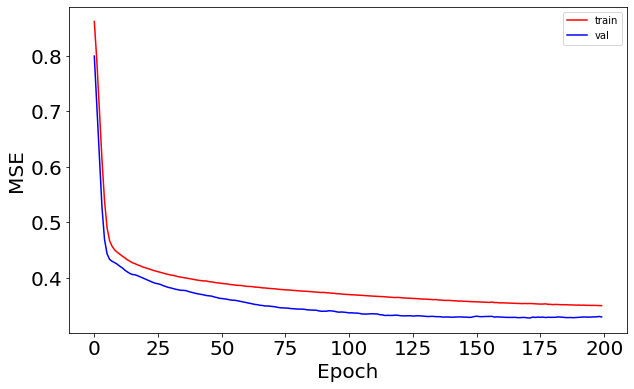

In [34]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Comparación de modelos

In [35]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF','Tree', ' SVR', 'NN'], 'MSE': [mse_lr, mse_ridge, mse_rf, mse_tree,mse_svr, mse_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,MSE
0,LR,0.181585
1,Ridge,0.181576
2,RF,0.106677
3,Tree,0.115145
4,SVR,0.151407
5,NN,0.120497


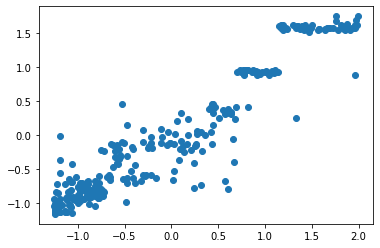

In [36]:
# Make cross validated predictions
predictions = cross_val_predict(new_model_RF, X_test, y_test, cv=6)
plt.scatter(y_test, predictions)

In [37]:
accuracy = metrics.r2_score(y_test, predictions)
accuracy

0.8974372179126755